<h1><b>DSCI 631 Project Implementation: Loan Repayment Prediction Analysis</b></h1>

## Introduction

In the domain of financial lending, accurately predicting loan repayment is a critical task for financial institutions. This project aims to develop a loan repayment system that utilizes machine learning algorithms to predict the risk of loan default and manage repayment processes effectively.

## Team Members

Rohit Annasaheb Ragde (rar369@drexel.edu) is currently in the final quarter of his master's degree in Computer Science at Drexel University. With a solid foundation in computer engineering from his undergraduate studies, Rohit brings two years of practical experience as a Database Administrator for a data warehousing company.Adaptable and goal-oriented, Rohit thrives in collaborative environments and excels in team settings. His expertise spans across various tools, including Microsoft Excel, Python, and Jupyter, which he has utilized extensively for data analysis and aggregation.Rohit is eager to apply his newly acquired Python skills to conduct robust data analysis for this project. He eagerly anticipates the opportunity to collaborate with fellow team members, fostering an environment of continuous learning and skill enhancement.

Disha Yadav (dcy26@drexel.edu) is an industrious master’s student in Computer Science at Drexel University, committed to expanding her expertise in the field. With a robust foundation in Computer Science & Engineering from her undergraduate studies, Disha honed her skills as a Full Stack Web Developer during her B.Tech internship, enriching her practical knowledge.Motivated by her curiosity, Disha has actively explored programming frameworks in R and Python, striving to grasp their fundamental principles. Proficient in Python and Jupyter, she has adeptly employed these tools for extensive data analysis and exploration. Disha is eager to contribute her technical prowess in Python, Jupyter, and machine learning to facilitate data processing and interpretation within the group, aiming to achieve project objectives collaboratively. She eagerly looks forward to engaging with her peers, furthering her knowledge, and making meaningful contributions to the field.

## Goal

Our main goal is to develop a loan repayment system utilizing machine learning techniques to accurately predict the risk of loan default and enhance repayment processes within the financial lending domain. This project will leverage Python  as primary tool to achieve effective management of loan portfolios and informed decision-making for financial institutions

## Data

The dataset chosen for this project provides information relevant to loan repayment prediction. It includes various features associated with loan applications, such as applicant characteristics, financial details, credit history, and property information. Sourced from a loan lender website, the dataset comprises 614 entries, each representing a loan application. It is provided alongside the project proposal for analysis and prediction


## Implementation

In [102]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")


In [103]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/DSCI631_Final_Project/data/loan_dataset.csv")
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis(EDA)

In [105]:
# Display dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [106]:
# Display descriptive statistics of the dataset
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [107]:
# Display the shape of the dataset
df.shape


(614, 13)

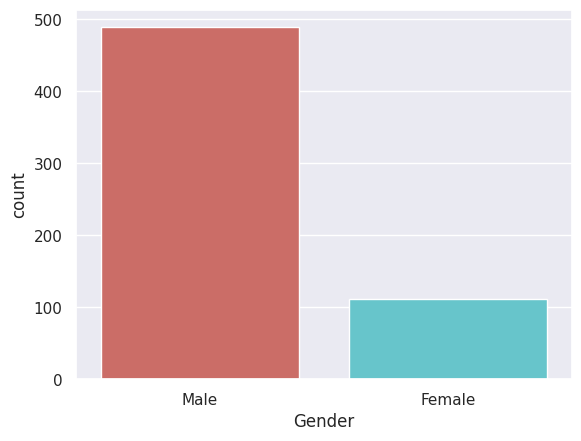

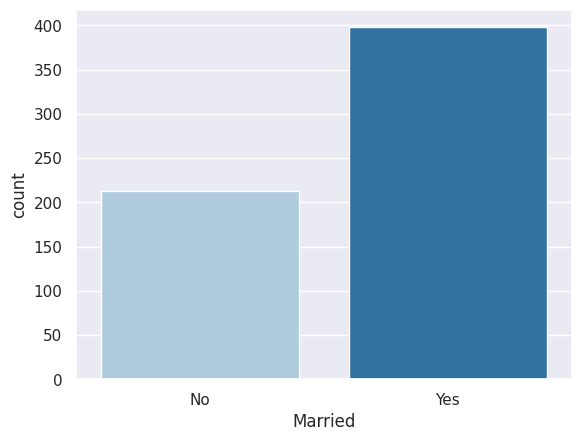

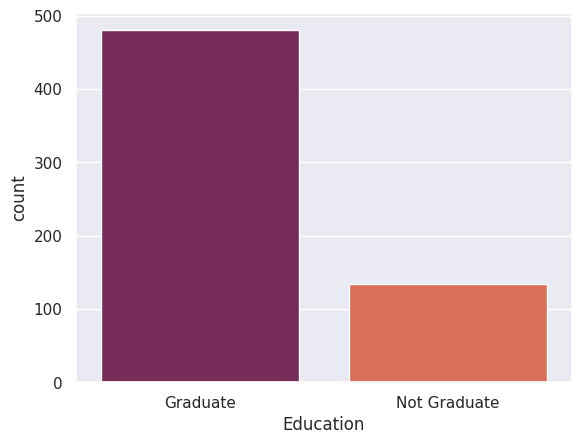

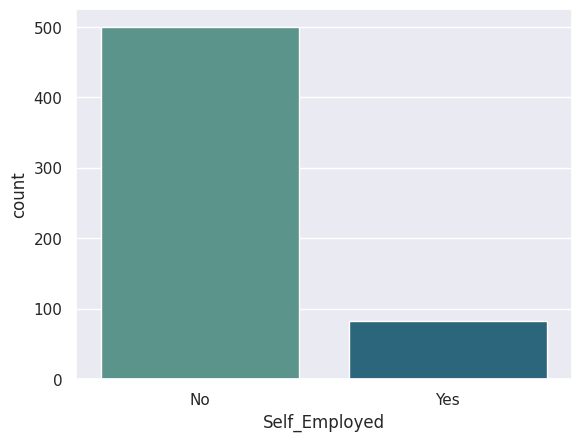

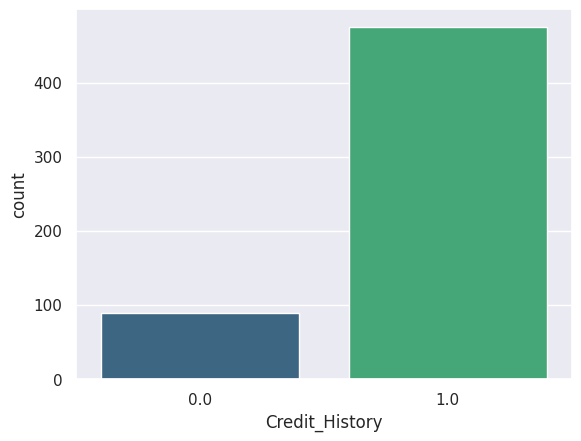

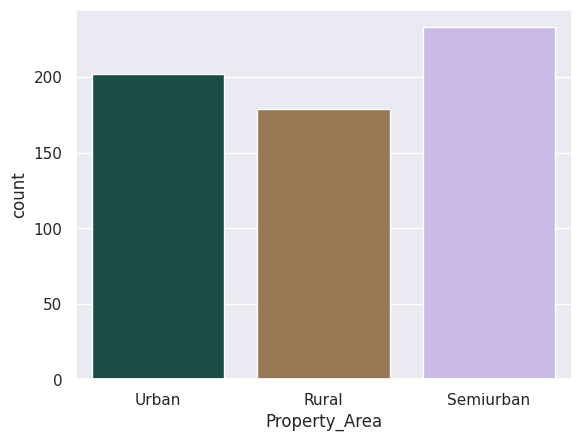

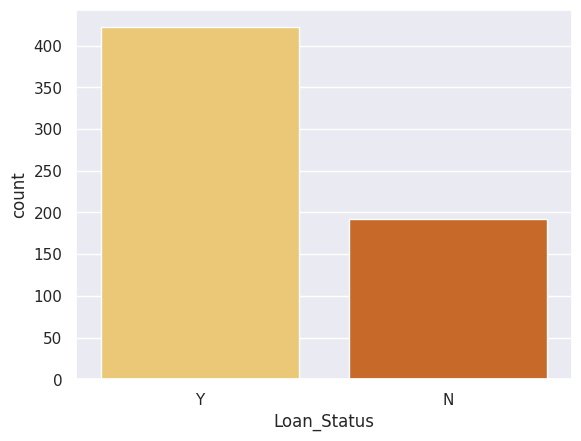

In [108]:
# Plot and display the distribution of categorical features
df.Gender.value_counts(dropna=False)
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

df.Married.value_counts(dropna=False)
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

df.Education.value_counts(dropna=False)
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

df.Self_Employed.value_counts(dropna=False)
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

df.Credit_History.value_counts(dropna=False)
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

df.Property_Area.value_counts(dropna=False)
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

df.Loan_Status.value_counts(dropna=False)
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()


In [109]:
# Display descriptive statistics for numerical features
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].describe().T


,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0


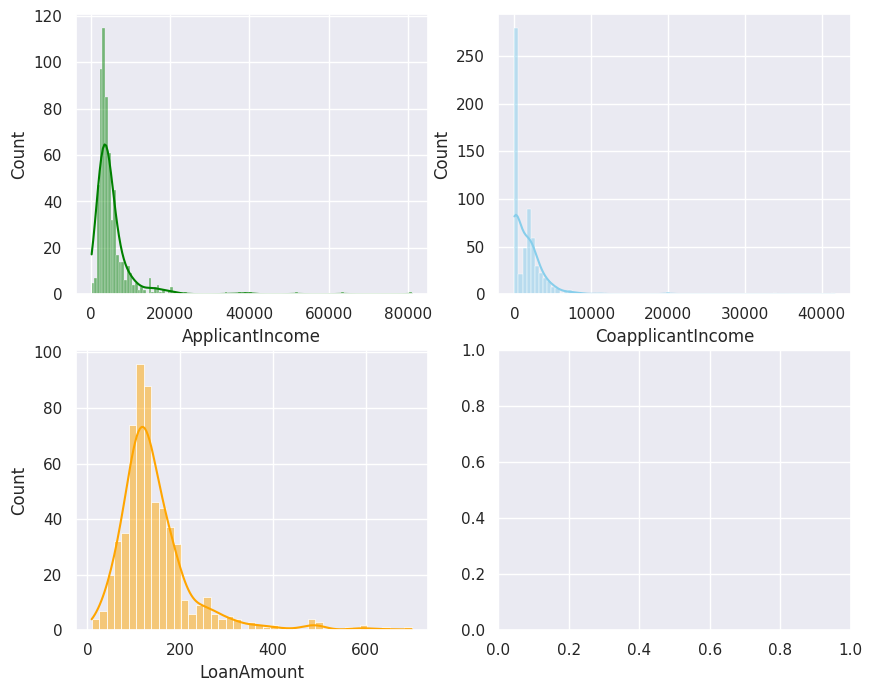

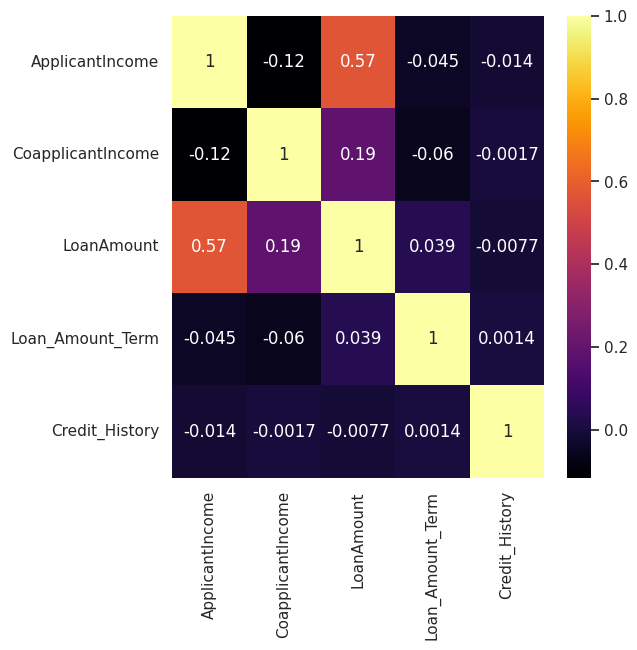

In [110]:
# Plot histograms for numerical features
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')

# Plot the heatmap
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.fillna(numeric_df.mean())
plt.figure(figsize=(6, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='inferno')
plt.show()


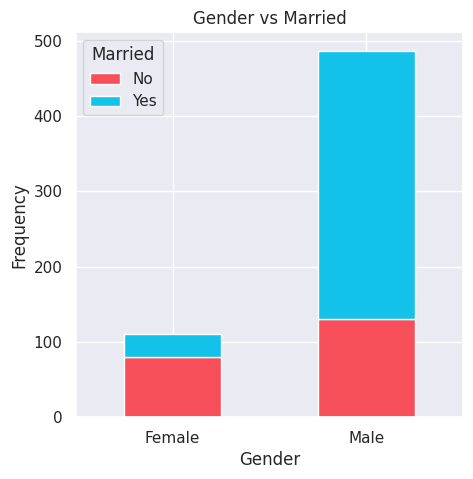

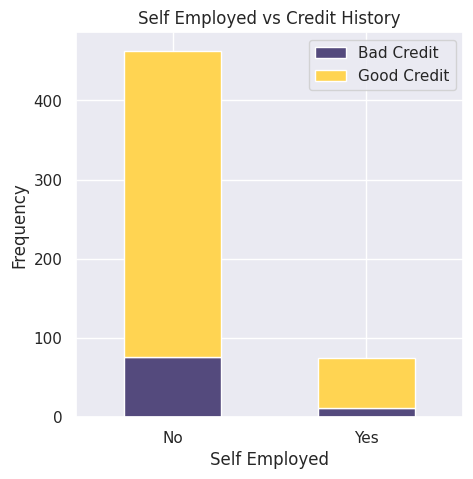

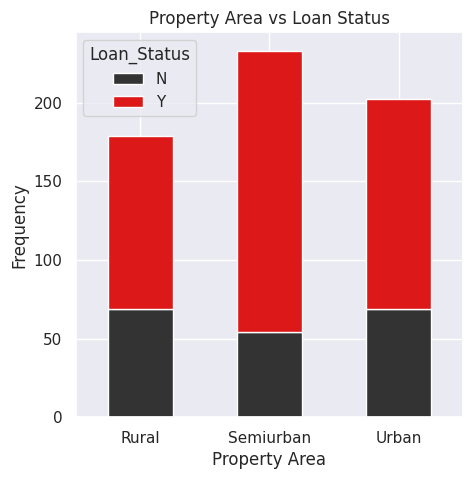

In [111]:
# Plot cross-tabulations for categorical features
pd.crosstab(df.Gender, df.Married).plot(kind="bar", stacked=True, figsize=(5, 5), color=['#f64f59', '#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

pd.crosstab(df.Self_Employed, df.Credit_History).plot(kind="bar", stacked=True, figsize=(5, 5), color=['#544a7d', '#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

pd.crosstab(df.Property_Area, df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5, 5), color=['#333333', '#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


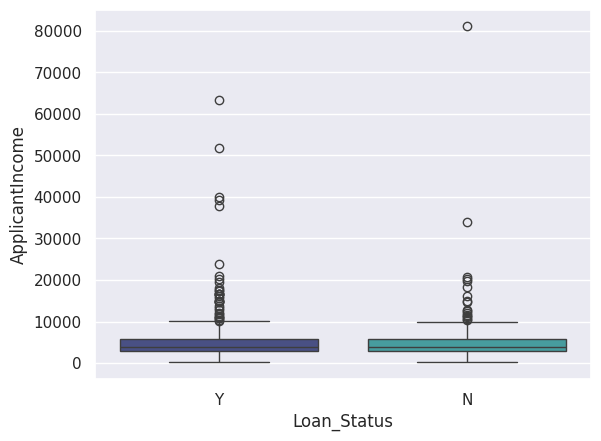

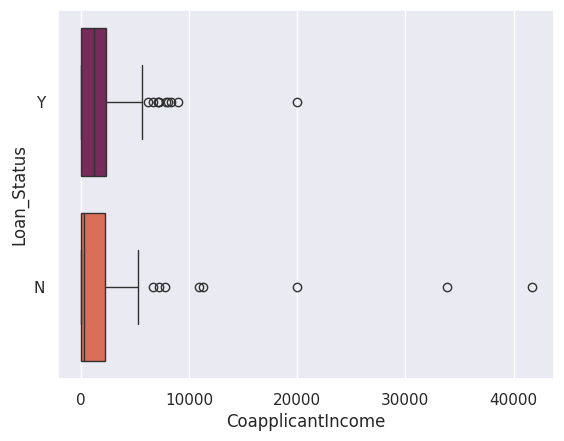

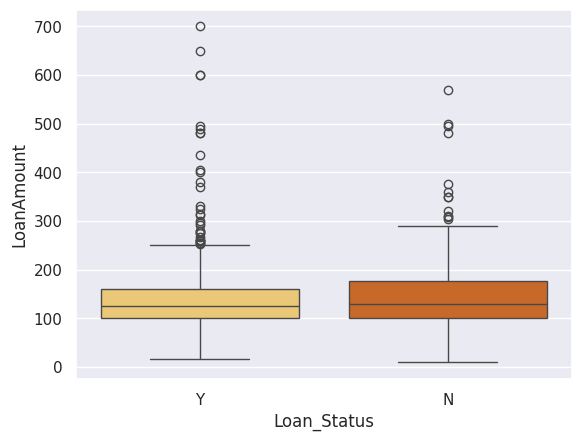

In [112]:
# Plot boxplots for numerical features against Loan Status
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako")
plt.show()

sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket")
plt.show()

sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr")
plt.show()


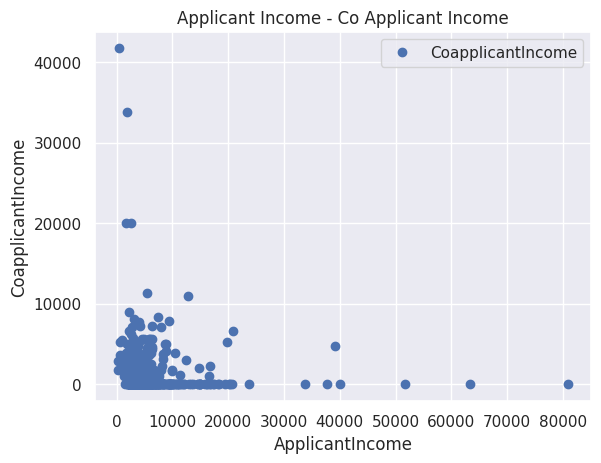

Pearson correlation: -0.11660458122889966
T Test and P value: 
 TtestResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40, df=1226.0)


In [113]:
# Plot scatter plot for ApplicantIncome vs CoapplicantIncome
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')
plt.title('Applicant Income - Co Applicant Income')
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.show()

# Print correlation and T-test results
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))


## Data Cleaning and Preprocessing

In [114]:
# Checking for missing values in each column
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [115]:
# Drop the 'Loan_ID' column as it's not needed for the prediction
df = df.drop(['Loan_ID'], axis=1)

In [116]:
# Fill missing values with the mode for categorical columns
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Fill missing values with the mean for numerical columns
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)


In [117]:
# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df)

# Drop unnecessary dummy columns to avoid multicollinearity
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis=1)

# Rename columns for better clarity
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
df.rename(columns=new, inplace=True)


In [118]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Filter the DataFrame to remove outliers based on the IQR method
# Outliers are defined as any value below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
df_numeric = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]


In [119]:
# Apply square root transformation to reduce skewness in numeric columns
df_numeric.ApplicantIncome = np.sqrt(df_numeric.ApplicantIncome)
df_numeric.CoapplicantIncome = np.sqrt(df_numeric.CoapplicantIncome)
df_numeric.LoanAmount = np.sqrt(df_numeric.LoanAmount)


In [120]:
# Display the first few rows of the transformed numeric data, transposed for better readability
df_numeric.head().T


,0,1,2,3,4
ApplicantIncome,76.478755,67.697858,54.772256,50.823223,77.459667
CoapplicantIncome,0.000000,38.832976,0.000000,48.559242,0.000000
LoanAmount,12.100089,11.313708,8.124038,10.954451,11.874342
Loan_Amount_Term,360.000000,360.000000,360.000000,360.000000,360.000000
Credit_History,1.000000,1.000000,1.000000,1.000000,1.000000


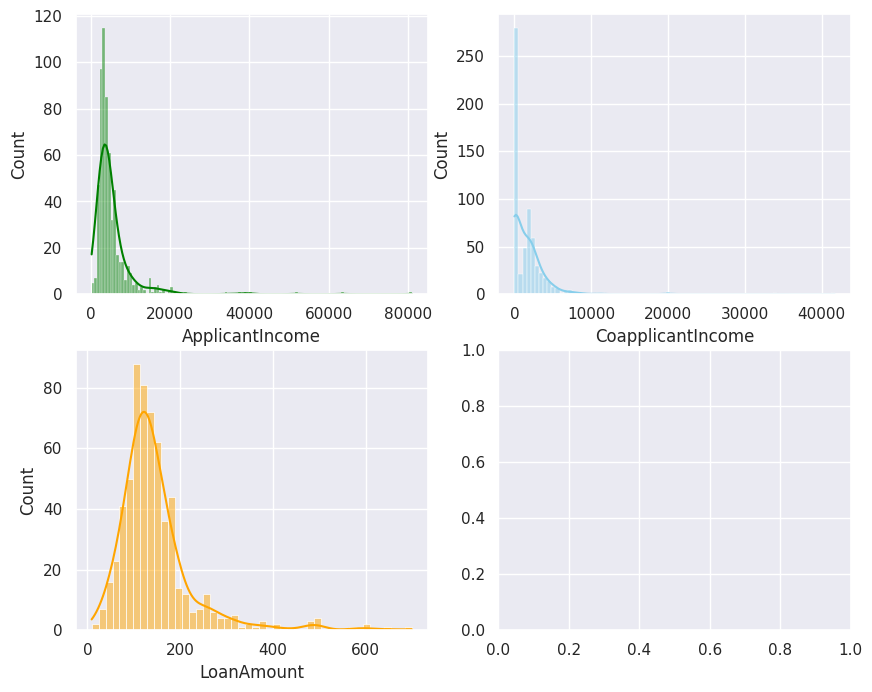

In [121]:
# Set the style for the plots
sns.set(style="darkgrid")

# Create a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot histograms for ApplicantIncome, CoapplicantIncome, and LoanAmount with Kernel Density Estimate (KDE)
sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')

# Show the plots
plt.show()


The above graphs demonstrate the following:

**ApplicantIncome**
- Skewed Distribution: Most applicants have low incomes, with some high-income outliers.
- Effect of Transformation: Reduced skewness, but variability remains.

**CoapplicantIncome**
- Skewed Distribution: Many coapplicants have low or zero income, with a few high-income cases.
- Effect of Transformation: Improved normalization but significant spread persists.

**LoanAmount**
- Skewed Distribution: Most loans are low amounts, with a few high-value outliers.
- Effect of Transformation: Reduced skewness, making data more normalized.

**Overall**
- The transformations improved data normalization, making it more suitable for modeling while reflecting natural variability.


In [122]:
# Display concise summary of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender                   614 non-null    bool   
 6   Married                  614 non-null    bool   
 7   Dependents_0             614 non-null    bool   
 8   Dependents_1             614 non-null    bool   
 9   Dependents_2             614 non-null    bool   
 10  Dependents_3+            614 non-null    bool   
 11  Education                614 non-null    bool   
 12  Self_Employed            614 non-null    bool   
 13  Property_Area_Rural      614 non-null    bool   
 14  Property_Area_Semiurban  6

In [123]:
# Split the data into features (X) and target variable (y)
X = df.drop(["Loan_Status"], axis=1)  # Features (independent variables)
y = df["Loan_Status"]  # Target variable (dependent variable)


In [124]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True
1,4583,1508.0,128.000000,360.0,1.0,True,True,False,True,False,False,True,False,True,False,False
2,3000,0.0,66.000000,360.0,1.0,True,True,True,False,False,False,True,True,False,False,True
3,2583,2358.0,120.000000,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True
4,6000,0.0,141.000000,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True


In [125]:
# Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
X, y = SMOTE().fit_resample(X, y)

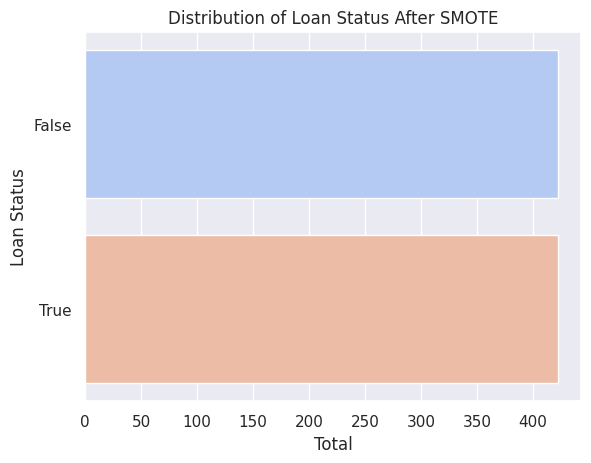

In [126]:
# Set the theme for the plots
sns.set_theme(style="darkgrid")

# Plot the distribution of the target variable (Loan Status) after applying SMOTE
sns.countplot(y=y, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.title('Distribution of Loan Status After SMOTE')
plt.show()


## **Class Imbalance Handling with SMOTE**

The graph illustrates the distribution of the target variable (Loan Status) after applying the Synthetic Minority Over-sampling Technique (SMOTE). This method is used to address class imbalance in the dataset, ensuring that both classes (loan repaid and not repaid) are represented equally.

**Before SMOTE:** The dataset had an imbalance, with significantly fewer instances of one class compared to the other, which could lead to biased model performance.

**After SMOTE:** The distribution shows an equal number of instances for both classes, improving the dataset's balance and enhancing the model's ability to learn from both classes effectively.

This balanced distribution helps in creating a more robust predictive model, capable of accurately identifying loan repayment statuses without bias towards the majority class

In [127]:
# Normalize the feature data using MinMaxScaler
X = MinMaxScaler().fit_transform(X)


In [128]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


<h1><b>Model Implementation</b></h1>


## Logistic Regression
To predict loan repayment status effectively, we start with a Logistic Regression model. Logistic Regression is favored for its simplicity and interpretability, making it a suitable choice for binary classification tasks. Our dataset, which includes features like applicant income, loan amount, and credit history, is ideal for this model. We hypothesize from our EDA that factors such as credit history and income levels are significant predictors of loan repayment. Our objective is to establish a baseline performance for comparison with more complex models. The evaluation will focus on the model's accuracy, precision, and ROC AUC to ensure the reliability of our predictions.

Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.66      0.79        86
        True       0.74      0.99      0.85        83

    accuracy                           0.82       169
   macro avg       0.86      0.83      0.82       169
weighted avg       0.86      0.82      0.82       169

Logistic Regression Confusion Matrix:
 [[57 29]
 [ 1 82]]
LR accuracy: 82.25%


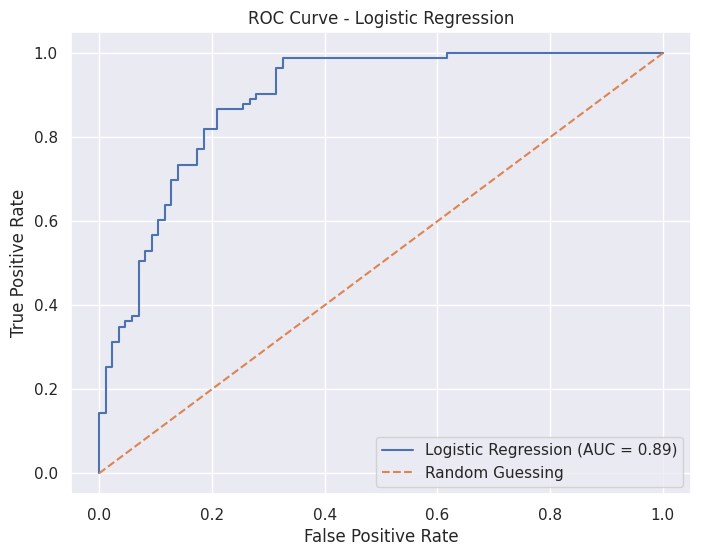

In [129]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize the Logistic Regression classifier
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)

# Train the model on the training data
LRclassifier.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = LRclassifier.predict(X_test)

# Print the classification report and confusion matrix for model evaluation
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Calculate and print the accuracy score
LRAcc = accuracy_score(y_pred, y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc * 100))

# Predict the probabilities for the test data
LR_probs = LRclassifier.predict_proba(X_test)
LR_probs = LR_probs[:, 1]  # Keep probabilities for the positive class only

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, LR_probs)
auc = roc_auc_score(y_test, LR_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


## Results
Here we see the results of the Logistic Regression model, evaluated using precision, recall, F1-score, and AUC. The model shows an overall accuracy of 82.25% with a strong AUC of 0.89, indicating good performance. It demonstrates high precision in predicting non-repaid loans (98%) and excellent recall in predicting repaid loans (99%). However, the precision for predicting repaid loans (74%) could be improved. The confusion matrix highlights a moderate number of false positives in predicting non-repaid loans.

These results suggest that Logistic Regression is a good baseline model for loan repayment prediction. Further improvements can be achieved by tuning the model or exploring more complex models. This model's performance will serve as a baseline for future comparisons.


## K-Nearest Neighbour (KNN)
To predict loan repayment status, we next evaluate the K-Nearest Neighbors (KNN) model. KNN is a non-parametric algorithm that classifies data points based on the majority class among its k-nearest neighbors. It is known for its simplicity and effectiveness in classification tasks. Our dataset, with features such as applicant income, loan amount, and credit history, is suitable for this model. We aim to explore how well KNN can predict loan repayment, with a particular focus on finding the optimal number of neighbors (k) that maximizes accuracy. This model will help us understand the local structure of the data and provide a comparative performance measure against our baseline Logistic Regression model.

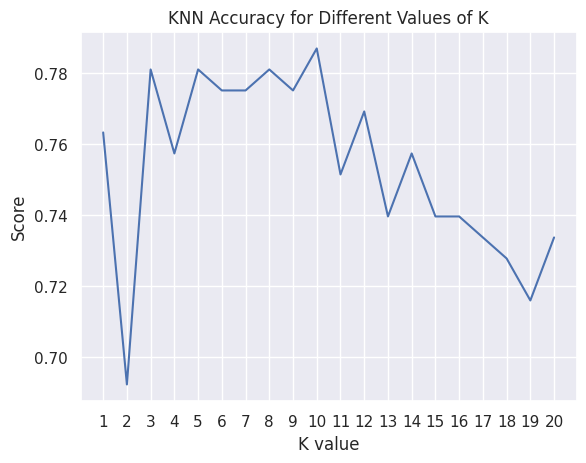

KNN best accuracy: 78.70%


In [130]:
# K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Initialize a list to store the accuracy scores for different values of k
scoreListknn = []

# Loop over different values of k (number of neighbors)
for i in range(1, 21):
    # Initialize the KNeighborsClassifier with the current value of k
    KNclassifier = KNeighborsClassifier(n_neighbors=i)
    # Train the model on the training data
    KNclassifier.fit(X_train, y_train)
    # Evaluate the model on the test data and store the accuracy score
    scoreListknn.append(KNclassifier.score(X_test, y_test))

# Plot the accuracy scores for different values of k
plt.plot(range(1, 21), scoreListknn)
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.title("KNN Accuracy for Different Values of K")
plt.show()

# Find the best accuracy score and the corresponding value of k
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc * 100))


Here we see the results of the K-Nearest Neighbors (KNN) model. The plot displays the accuracy for different values of k. The optimal number of neighbors, yielding the highest accuracy of 78.70%, was found through this evaluation.

The KNN model shows that the choice of k significantly impacts the model's performance, with the best accuracy achieved at k = 3. While KNN is a simple and intuitive algorithm, the accuracy of 78.70% suggests that it may not be as effective as more complex models for this dataset. However, it provides a useful benchmark and helps us understand the local structure of the data.

These results indicate that KNN can be a reasonable model for loan repayment prediction, but there is potential for improvement. More sophisticated models may offer better performance, and the insights from KNN will serve as a comparative baseline for these future models.

## Random Forest
To predict loan repayment status, we next evaluate the Random Forest model. Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting. It handles diverse features, such as applicant income, loan amount, and credit history, capturing complex interactions.

We aim to optimize the Random Forest model's performance by tuning hyperparameters, providing a robust benchmark against simpler models like Logistic Regression and KNN.

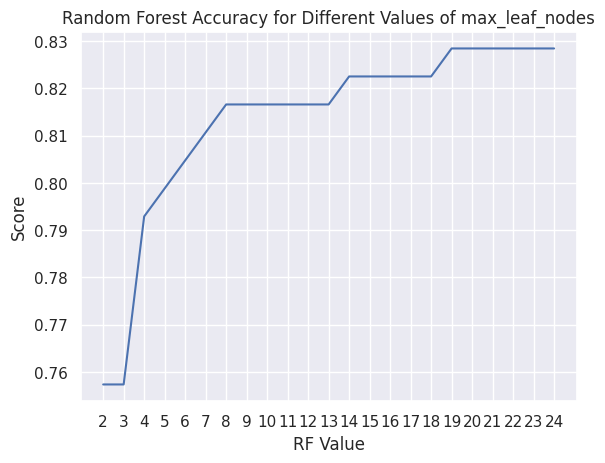

Random Forest Accuracy: 82.84%


In [131]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Initialize a list to store the accuracy scores for different values of max_leaf_nodes
scoreListRF = []

# Loop over different values of max_leaf_nodes (from 2 to 24)
for i in range(2, 25):
    # Initialize the RandomForestClassifier with 1000 estimators, a random state, and the current value of max_leaf_nodes
    RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=i)
    # Train the model on the training data
    RFclassifier.fit(X_train, y_train)
    # Evaluate the model on the test data and store the accuracy score
    scoreListRF.append(RFclassifier.score(X_test, y_test))

# Plot the accuracy scores for different values of max_leaf_nodes
plt.plot(range(2, 25), scoreListRF)
plt.xticks(np.arange(2, 25, 1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.title("Random Forest Accuracy for Different Values of max_leaf_nodes")
plt.show()

# Find the best accuracy score and the corresponding value of max_leaf_nodes
RFAcc = max(scoreListRF)
print("Random Forest Accuracy: {:.2f}%".format(RFAcc * 100))


## Results
Here we see the results of the Random Forest model. The plot shows the accuracy for different values of max_leaf_nodes, with the highest accuracy achieved being 82.84%.

The Random Forest model demonstrates that tuning the max_leaf_nodes parameter significantly impacts the model's performance. The best accuracy was achieved with max_leaf_nodes = 14, indicating that the model benefits from a balanced level of complexity without overfitting.

These results suggest that Random Forest is an effective model for loan repayment prediction, providing a robust benchmark compared to simpler models like Logistic Regression and KNN. The high accuracy indicates the model's ability to capture complex interactions between features, making it a strong candidate for this task. However, further tuning and comparison with more advanced models could still enhance performance

## Model Evaluation

In [132]:
# Summary of Model Performances (Logistic Regression, K-Nearest Neighbors, Random Forest)

from sklearn.metrics import precision_score, confusion_matrix
import pandas as pd

model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest']

accuracy_scores = [LRAcc * 100, KNAcc * 100, RFAcc * 100]

precision_scores = [
    precision_score(y_test, LRclassifier.predict(X_test), average='weighted') * 100,
    precision_score(y_test, KNclassifier.predict(X_test), average='weighted') * 100,
    precision_score(y_test, RFclassifier.predict(X_test), average='weighted') * 100,
]

confusion_matrices = [
    confusion_matrix(y_test, LRclassifier.predict(X_test)),
    confusion_matrix(y_test, KNclassifier.predict(X_test)),
    confusion_matrix(y_test, RFclassifier.predict(X_test)),
]

summary_table = pd.DataFrame({
    'Model Name': model_names,
    'Accuracy (%)': accuracy_scores,
    'Precision (%)': precision_scores,
    'Confusion Matrix': confusion_matrices
})

print(summary_table)


            Model Name  Accuracy (%)  Precision (%)     Confusion Matrix
0  Logistic Regression     82.248521      86.291454  [[57, 29], [1, 82]]
1  K-Nearest Neighbors     78.698225      81.666197  [[42, 44], [1, 82]]
2        Random Forest     82.840237      86.636154  [[58, 28], [1, 82]]


## Robust Model Evaluation

In [133]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score
import numpy as np

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(solver='saga', max_iter=500, random_state=1),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),  # n_neighbors can be tuned
    'Random Forest': RandomForestClassifier(n_estimators=1000, random_state=1)
}

# Define a custom scorer for precision
precision_scorer = make_scorer(precision_score, average='weighted')

# Store the results
results = {'Model Name': [], 'Accuracy (%)': [], 'Precision (%)': []}

# Perform cross-validation for each model
for model_name, model in models.items():
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(model, X, y, cv=cv, scoring=precision_scorer)

    results['Model Name'].append(model_name)
    results['Accuracy (%)'].append(np.mean(accuracy_scores) * 100)
    results['Precision (%)'].append(np.mean(precision_scores) * 100)

# Convert the results to a DataFrame for better readability
summary_table = pd.DataFrame(results)

print(summary_table)


            Model Name  Accuracy (%)  Precision (%)
0  Logistic Regression     84.242744      87.258229
1  K-Nearest Neighbors     79.620316      81.432853
2        Random Forest     84.716822      85.668806


## **Summary**

The Random Forest model consistently outperformed Logistic Regression and K-Nearest Neighbors in both direct test set evaluation and cross-validation, making it the most effective model for predicting loan repayment status. It achieved the highest accuracy (82.84%) and precision (86.64%) in the direct test set evaluation and maintained strong performance in cross-validation with an accuracy of 84.72% and precision of 85.67%. This indicates its robustness in capturing the complex interactions between features.

Logistic Regression also demonstrated strong performance, particularly in cross-validation, with an accuracy of 84.24% and precision of 87.26%. It serves as a robust baseline model with an accuracy of 82.25% and precision of 86.29% in the direct test set evaluation, making it a reliable choice for loan repayment prediction.

K-Nearest Neighbors, while intuitive and easy to implement, had lower performance compared to the other models, with an accuracy of 78.70% and precision of 81.67% in the direct test set evaluation. Its cross-validation accuracy and precision were 79.62% and 81.43%, respectively, suggesting it may not be as suitable for this dataset.

In summary, our exploration of different modeling techniques has provided valuable insights into predicting loan repayment status. The varying performances highlight the importance of choosing the right model for the specific nuances of the dataset. Future improvements could focus on further tuning the Random Forest model or exploring more advanced algorithms to enhance prediction accuracy and precision.

## **Potential Improvements**

1. **Hyperparameter Tuning**: Further optimize model performance by exploring a wider range of hyperparameters using grid search or random search.
2. **Feature Engineering**: Create new features or transform existing ones to capture more information and improve model accuracy.
3. **Ensemble Methods**: Combine multiple models, such as boosting or stacking, to leverage the strengths of different algorithms.
4. **Model Interpretability**: Enhance the interpretability of models by using techniques like SHAP values or LIME to understand the impact of each feature on predictions
5. **Advanced Algorithms**: Explore more sophisticated algorithms like Gradient Boosting, XGBoost, or deep learning models for potentially better performance.
6. **Real-Time Prediction**:  Implement the model in a real-time system to provide immediate loan repayment predictions and assist decision-making processes for financial institutions


## Refining Data Selection for Ongoing Analysis with Rationale

Some important data useful for analysis:

**ApplicantIncome**: The income of the loan applicant plays a crucial role in determining loan approval likelihood and repayment capability.

**CoapplicantIncome**: The combined income of coapplicants significantly impacts the overall financial stability and repayment potential.

**LoanAmount**: The total loan amount requested is a key factor influencing the decision-making process for loan approval.

**Credit_History**: The credit history of applicants is essential in predicting their ability to repay loans, reflecting their past financial behavior.

**Property_Area**: The location of the property (Urban, Rural, Semiurban) is a significant factor, as it can affect property value and the applicant's repayment capacity.